## Homework #8, Bairstow's Method of Root Finding
I'll be using Bairstow's method to find __all__ the roots of $$f(x)=x^6+10x^5-7x^4-3x^3+79x^2-46x-120$$

In [122]:
import numpy as np
np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt
import warnings
import cmath
warnings.filterwarnings("ignore")
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']
step_size = 1e-5

# Generic Function to create arbitrary plots with arbitrary subplots and functions
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14), roots=None):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            if roots:
                tmp = [root for root in roots if root.imag == 0]
                for root in tmp:
                    plt.axvline(x=root)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='upper right')
    
    plt.show()

### Function Definition of Bairstow's Method

In [129]:
# Function definition of f(x)
def f_x(x_vals):
    return (x ** 6 + 10 * x ** 5 - 7 * x ** 4 - 3 * x ** 3 + 79 * x ** 2 - 46 * x - 120)

# Returns the roots of x^2-rx-s for a given (r, s)
def quadratic_roots(r, s):
    det = r ** 2 + 4 * s
    root_1, root_2 = 0 + 0j, 0 + 0j
    root_1 = (r + np.sqrt(det)) / 2.0 if det > 0 else complex(r / 2.0, np.sqrt(abs(det)) / 2.0)
    root_2 = (r - np.sqrt(det)) / 2.0 if det > 0 else complex(r / 2.0, -(np.sqrt(abs(det)) / 2.0))
    return [root_1, root_2]    

# Bairstow root finding of the provided polynomial - First guess is x^2-rx-s
# Polynomial is factors in increasing order (Ax^0, Bx^1, Cx^2...) - Stops at epsilon
def bairstow_roots(polynomial, r_guess, s_guess, order, roots, epsilon=1e-10):
    if order < 1: # Polynomial cannot be divided
        return
    if order == 1: # First order polynomial, the root of (Ax+B) is just -B/A
        roots.append(-polynomial[0] / polynomial[1])
        return
    if order == 2: # Second order polynomial, calculate roots directly 
        # Scale r and s values in case there is a constant on the 2nd order x
        factored_roots = quadratic_roots(-polynomial[1]/polynomial[2], -polynomial[0]/polynomial[2])
        roots.append(factored_roots[0])
        roots.append(factored_roots[1])
        return
    
    n = len(polynomial) # Length of the current polynomial
    b, c = [0] * n, [0] * n
    b[n-1] = polynomial[n-1]
    b[n-2] = polynomial[n-2] + r_guess * b[n-1]
    c[n-1] = b[n-1]
    c[n-2] = b[n-2] + r_guess * c[n-1]
    rem_orders = n - 3 # Three orders have been found
    while rem_orders >= 0:
        b[rem_orders] = polynomial[rem_orders] + r_guess * b[rem_orders+1] + s_guess * b[rem_orders+2]
        c[rem_orders] = b[rem_orders] + r_guess * c[rem_orders+1] + s_guess * c[rem_orders+2]
        rem_orders -= 1
        
    # Update r, s values based off the polynomial division
    d_in    = 1.0 / (c[2] ** 2 - c[3] * c[1])
    r_guess = r_guess + d_in * (c[2] * -b[1] - c[3] * -b[0])
    s_guess = s_guess + d_in * (-c[1] * -b[1] + c[2] * -b[0])
    if abs(b[0]) + abs(b[1]) > epsilon: # Adjust s and r more, as the root estimations are off
        return bairstow_roots(polynomial, r_guess, s_guess, order, roots, epsilon)
    
    # With r, s values corrected to be exact roots, append to the array, subdivide and repeat
    if order >= 3: # More subdivision to be done, calculate new roots from updated r, s
        factored_roots = quadratic_roots(r_guess, s_guess)
        roots.append(factored_roots[0])
        roots.append(factored_roots[1])
        return bairstow_roots(b[2:], r_guess, s_guess, order-2, roots, epsilon)

### The Function, $f(x)$, Graphically

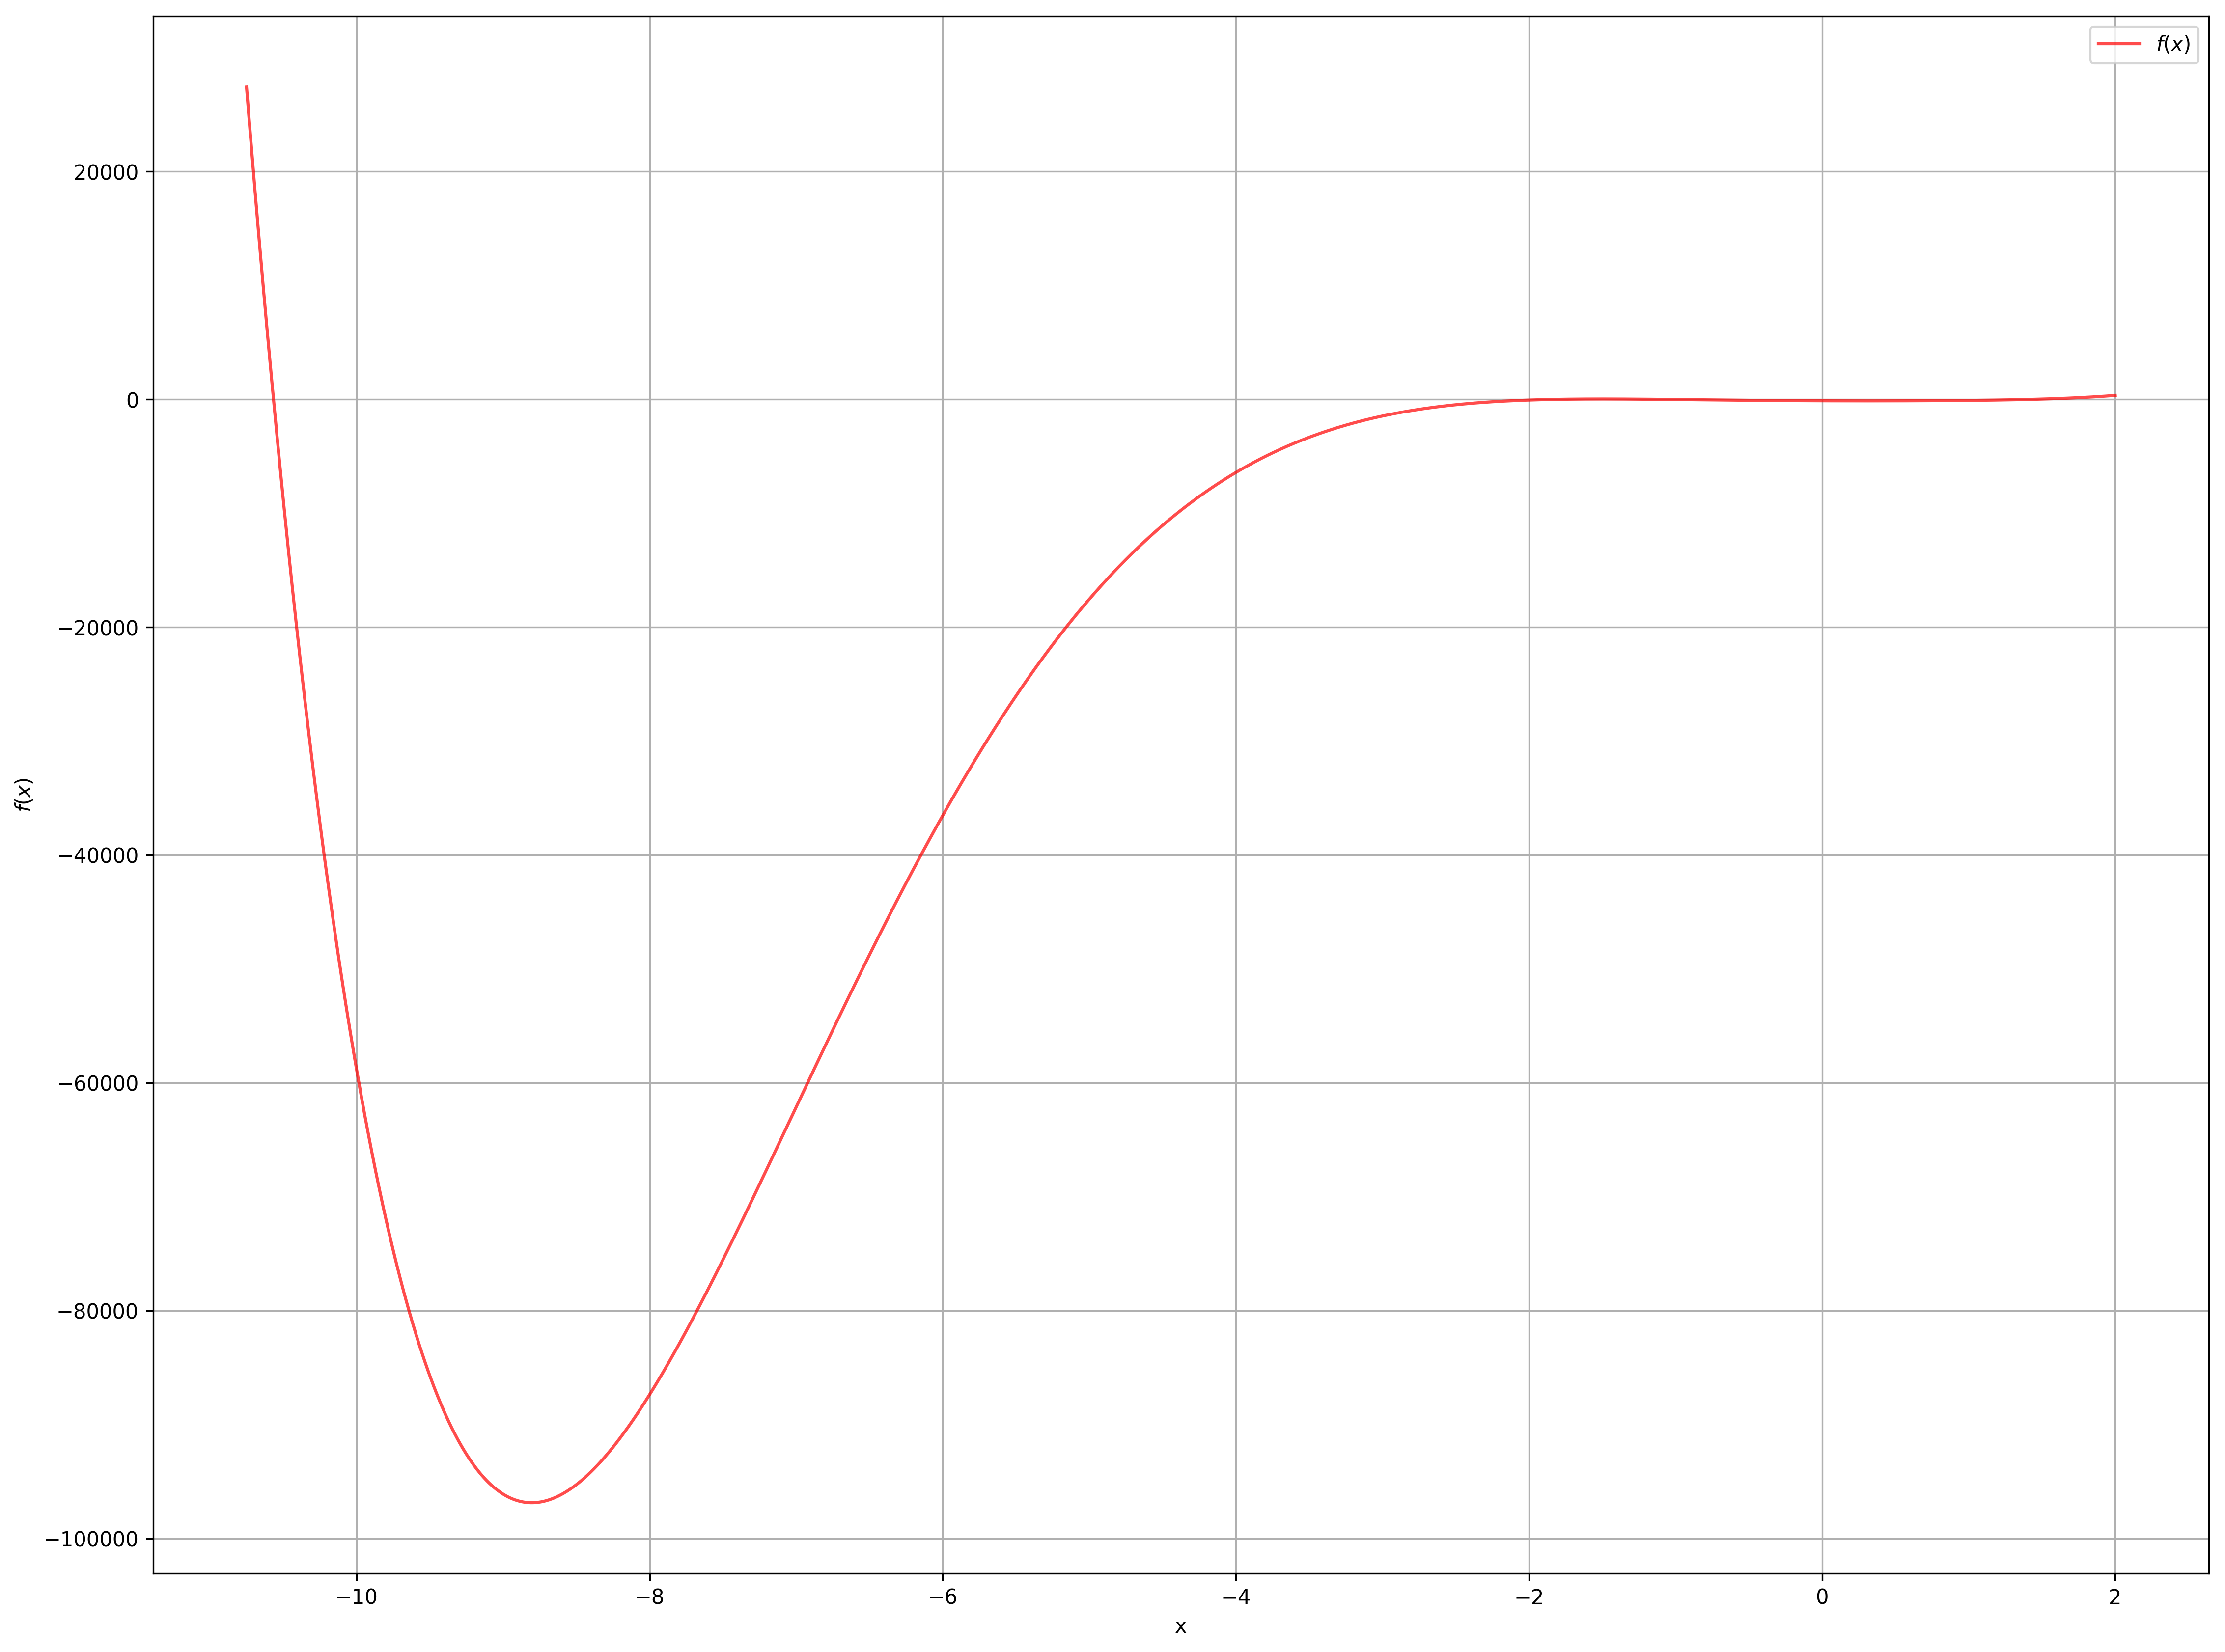

In [100]:
x = np.arange(-10.75, 2 + step_size, step_size)
create_plot([x], [(f_x(x), )], ["x"], ["$f(x)$"], [("$f(x)$", )], 1)

### The roots of $f(x)$ using the Bairstow Method

In [130]:
# Array definition of the function, f(x)
polynomial = [-120, -46, 79, -3, -7, 10, 1]
roots = []
bairstow_roots(polynomial, -1.0, -1.0, len(polynomial)-1, roots, 1e-8)
print ("The roots of f(x) are...\n", np.c_[roots])

The roots of f(x) are...
 [[  1.4109259317057465+0.j               ]
 [ -1.8338406392476472+0.j               ]
 [ -1.0578091549240414+0.j               ]
 [-10.56588293338245  +0.j               ]
 [  1.0233033979241961+1.761366732612204j]
 [  1.0233033979241961-1.761366732612204j]]


### The real roots of $f(x)$

[1.4109259317057465, -1.8338406392476472, -1.0578091549240414, -10.56588293338245]


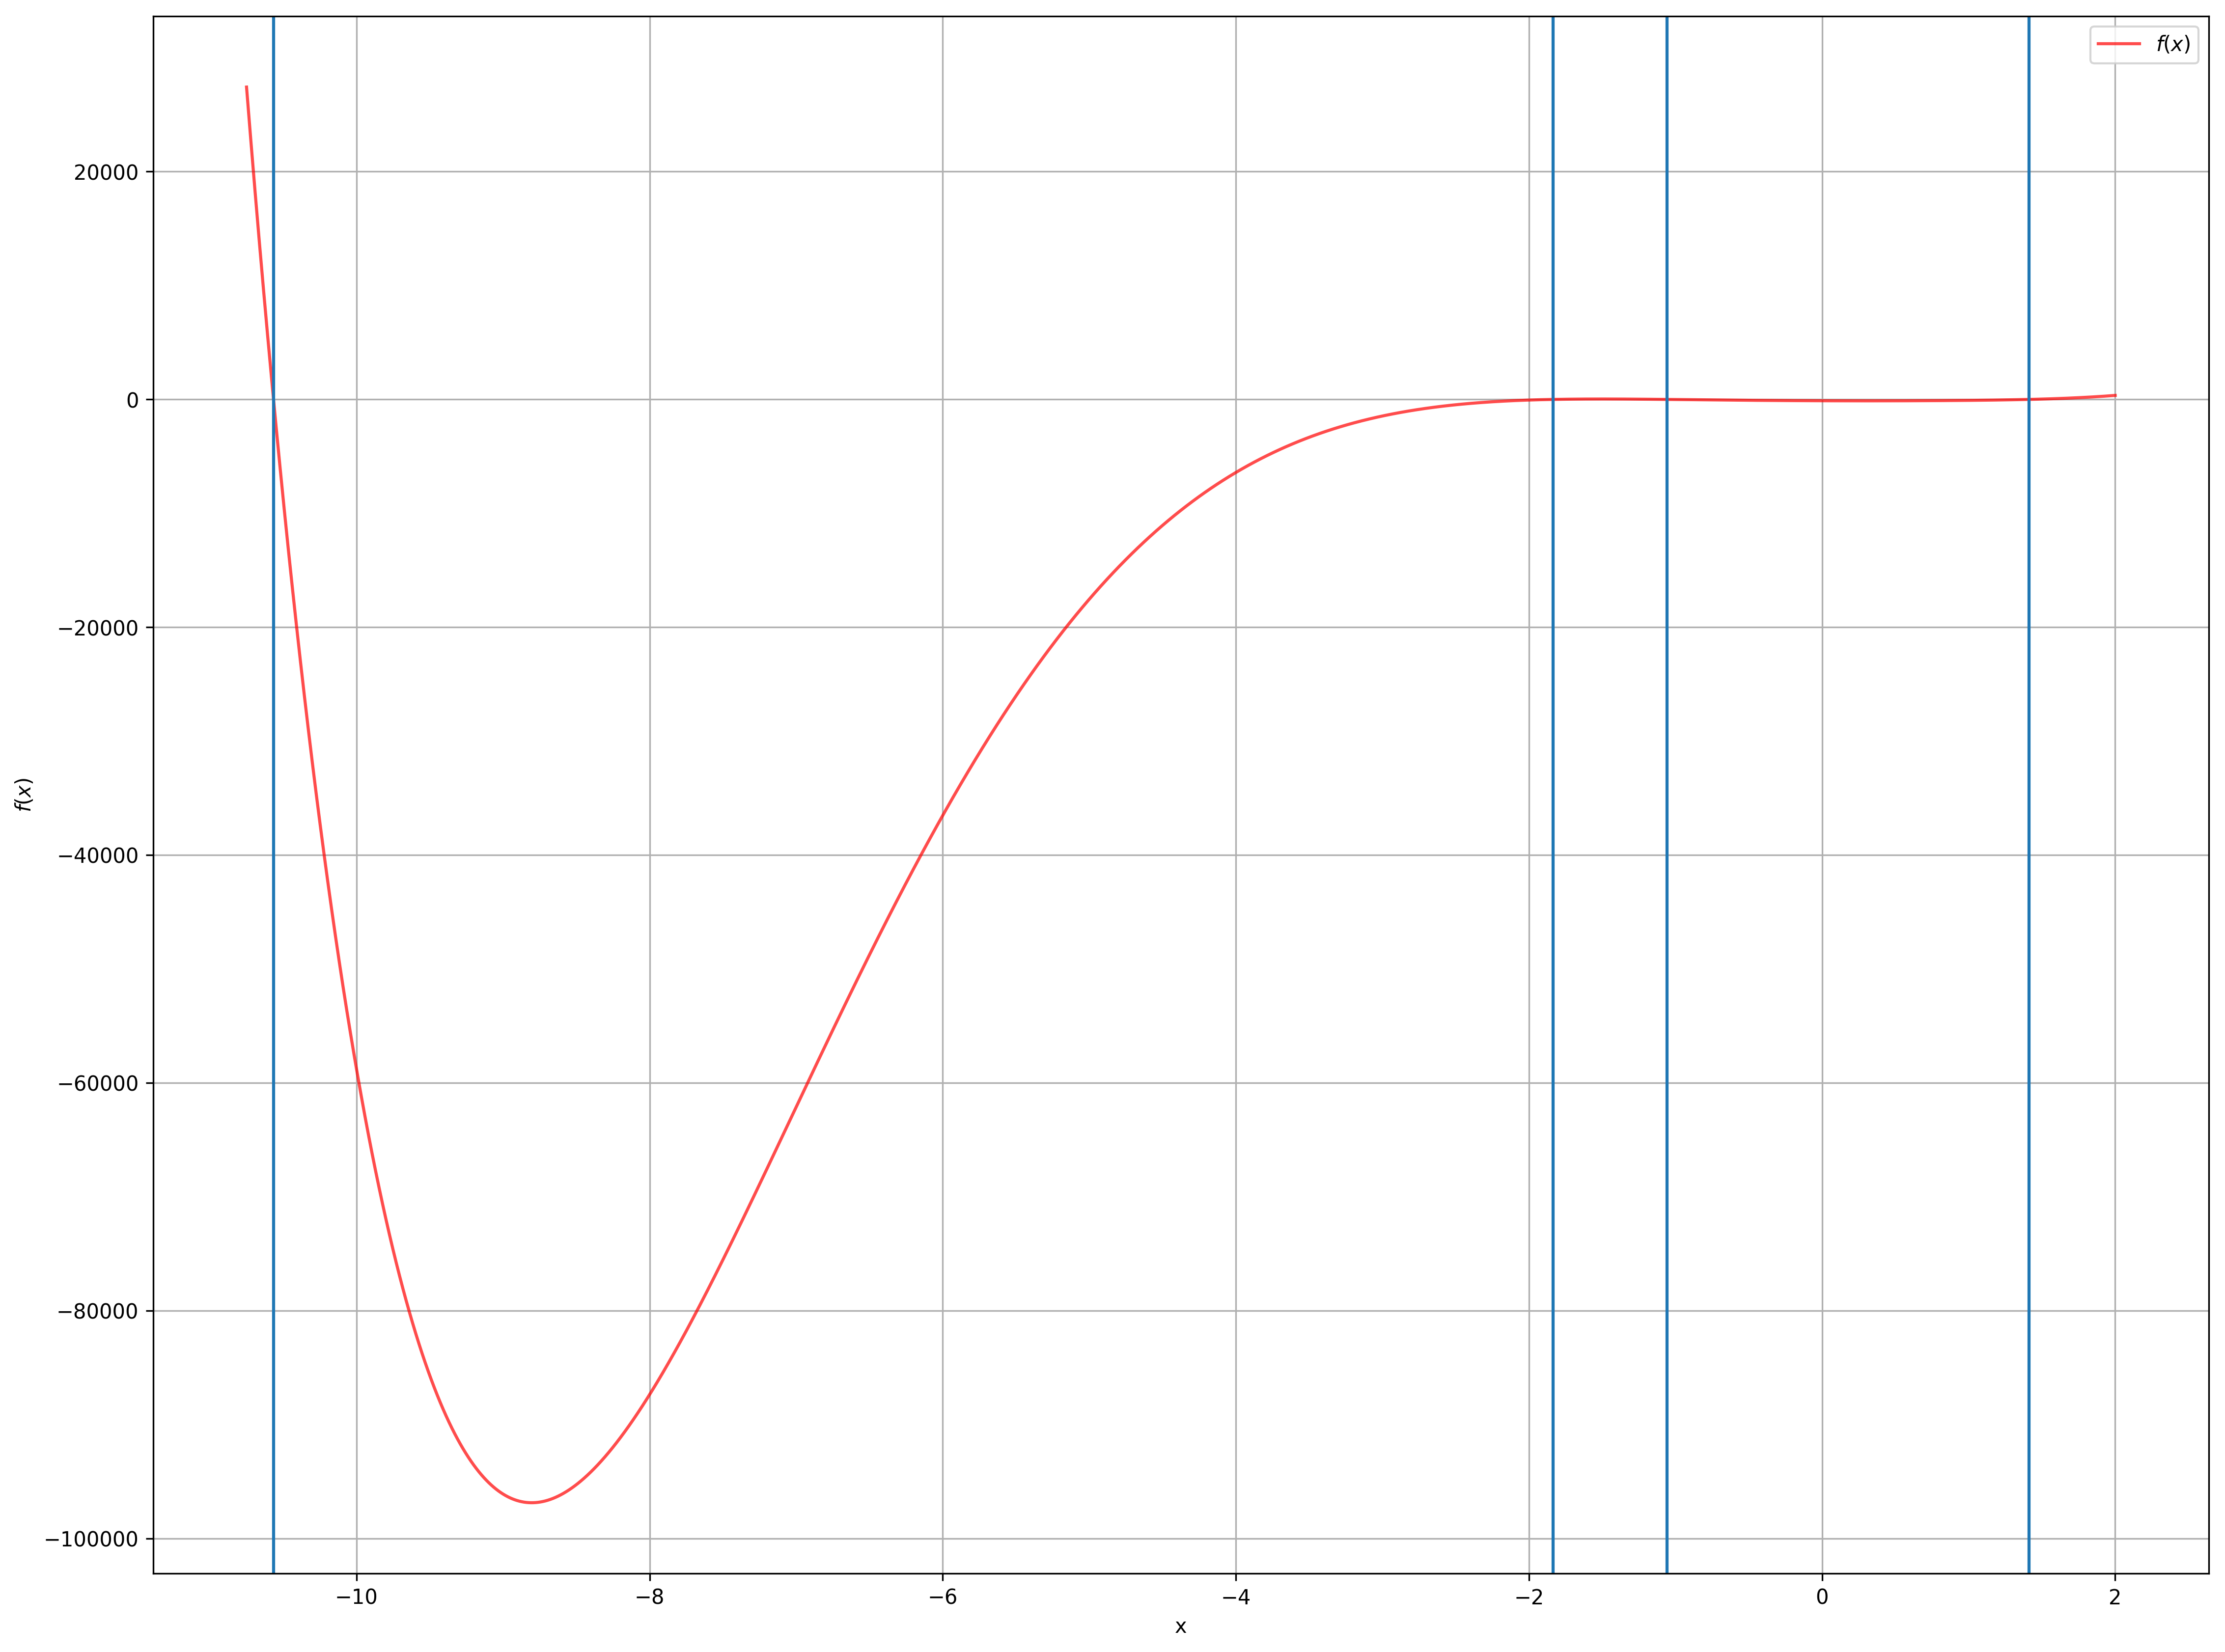

In [123]:
create_plot([x], [(f_x(x), )], ["x"], ["$f(x)$"], [("$f(x)$", )], 1, roots=roots)

### Conclusion
Although the implementation of the Bairstow method is quite complicated, and (at least _to me_) significantly less direct than the other root-finding methods, even with completely random 'initial guesses' (s and r), this algorithm systematically finds all roots of a provided polynomial. For a very complicated polynomial, especially those with complex roots, this is an extremely useful algorithm.